# Importing Libraries

In [2]:
#basic Libraries
import numpy as np
import pandas as pd
import warnings
import scipy

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries set up
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')


#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE as RFE
from sklearn.metrics import r2_score

# 1. Loading the dataset

In [35]:
df = pd.read_csv("spotify_dataset.csv", encoding='ISO-8859-1')

#got an error (UnicodeDecodeError: "utf-8") when loading the dataset for the 1st time. 
#The UnicodeDecodeError: ‘utf-8’ codec can’t decode bytes in position 0-1: invalid continuation byte error 
#is a common error that occurs when trying to read a file with Pandas that contains non-UTF-8 encoded characters. 
#UTF-8 is a character encoding standard that’s widely used for text files, but it’s not the only encoding format out there. 
#If you try to read a file with a different encoding format, you may encounter this error.

# 2. Initial exploration

In [4]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
df.shape

(952, 24)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   8

In [36]:
conditions = [    
    (df["released_month"] > 11) | (df["released_month"] <= 3),
    (df["released_month"] == 4) | (df["released_month"] == 5),
    (df["released_month"] >= 6) | (df["released_month"] <= 9),
    (df["released_month"] == 10) | (df["released_month"] == 11)
]

# create a list of the values we want to assign for each condition
values = ['Winter', 'Spring', 'Summer', 'Fall']
    
# create a new column and use np.select to assign values to it using our lists as arguments
df['released_season'] = np.select(conditions, values)

In [8]:
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_season
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Summer
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,Winter
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,Summer
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,Summer
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,Spring


# 3. Data cleaning and imputation

In [37]:
#Dropping columns not needed for this analysis

df.drop(["track_name", "artist(s)_name", "released_year", "released_month", "released_day"], axis=1, inplace=True)

In [10]:
df.shape

(952, 20)

In [11]:
# Checking for null values, we found some missing values in 2 columns.
#"in_shazam_charts" has 50/952 = 5% missing values and "key" has 10% missing values.
df.isnull().sum()

artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
released_season          0
dtype: int64

In [38]:
#Handling missing values
#We can fill "in_shazam_charts" column with the AVG of in_spotify_charts, in_apple_charts and in_deezer_charts

#mean_charts = sum(df[["in_spotify_charts", "in_apple_charts", "in_deezer_charts"]].mean())/3
##print(mean_charts)

# fill NaN values with the mean of each column
#df["in_shazam_charts"].fillna(mean_charts, inplace=True)

#We decide to drop the key and the shazam_charts columns because they both have more that 5% of total missing. And in the case of Shazam charts, Shazam was acquired by Apple in 2018, 
#so this variable is not going to add much different information than the Apple related variables.

df.drop("key", axis=1, inplace=True)
df.drop("in_shazam_charts", axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist_count          952 non-null    int64 
 1   in_spotify_playlists  952 non-null    int64 
 2   in_spotify_charts     952 non-null    int64 
 3   streams               952 non-null    int64 
 4   in_apple_playlists    952 non-null    int64 
 5   in_apple_charts       952 non-null    int64 
 6   in_deezer_playlists   952 non-null    int64 
 7   in_deezer_charts      952 non-null    int64 
 8   bpm                   952 non-null    int64 
 9   mode                  952 non-null    object
 10  danceability_%        952 non-null    int64 
 11  valence_%             952 non-null    int64 
 12  energy_%              952 non-null    int64 
 13  acousticness_%        952 non-null    int64 
 14  instrumentalness_%    952 non-null    int64 
 15  liveness_%            952 non-null    in

In [248]:
df.isnull().sum()

artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_season         0
LENGTH                  0
TOKENS                  0
POS                     0
ENTITIES                0
dtype: int64

In [13]:
df.shape

(952, 18)

In [14]:
# Check for duplicates
df.duplicated().sum()

0

# 4. Relationships in data

In [39]:
# Get summary statistics of the numerical data
df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,385.535714,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,1131.078760,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,44.000000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,164.250000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


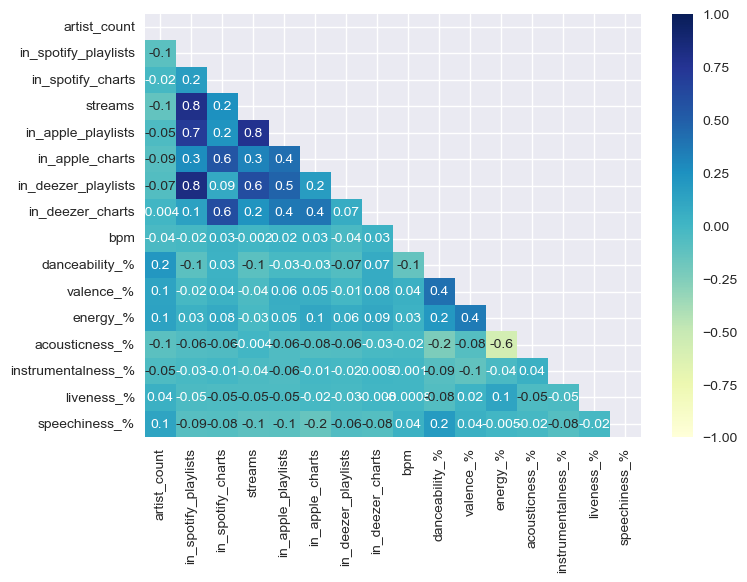

In [16]:
#Looking at correlation between variables

# creating mask to hide redundant information
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
  
# plotting correlation heatmap 
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt='.1g', mask=mask, vmin = -1, vmax = 1)

plt.show();

In [17]:
print(df.corr(numeric_only=True)["streams"].sort_values(ascending=False))


streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.598131
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
bpm                    -0.002438
acousticness_%         -0.004485
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
Name: streams, dtype: float64


In [40]:
# dropping low correlated variables

df.drop(columns= ["bpm", "acousticness_%", "energy_%", "valence_%", "instrumentalness_%", "liveness_%"], axis=1, inplace=True)

In [19]:
df.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,mode,danceability_%,speechiness_%,released_season
0,2,553,147,141381703,43,263,45,10,Major,80,4,Summer
1,1,1474,48,133716286,48,126,58,14,Major,71,4,Winter
2,1,1397,113,140003974,94,207,91,14,Major,51,6,Summer
3,1,7858,100,800840817,116,207,125,12,Major,55,15,Summer
4,1,3133,50,303236322,84,133,87,15,Minor,65,6,Spring


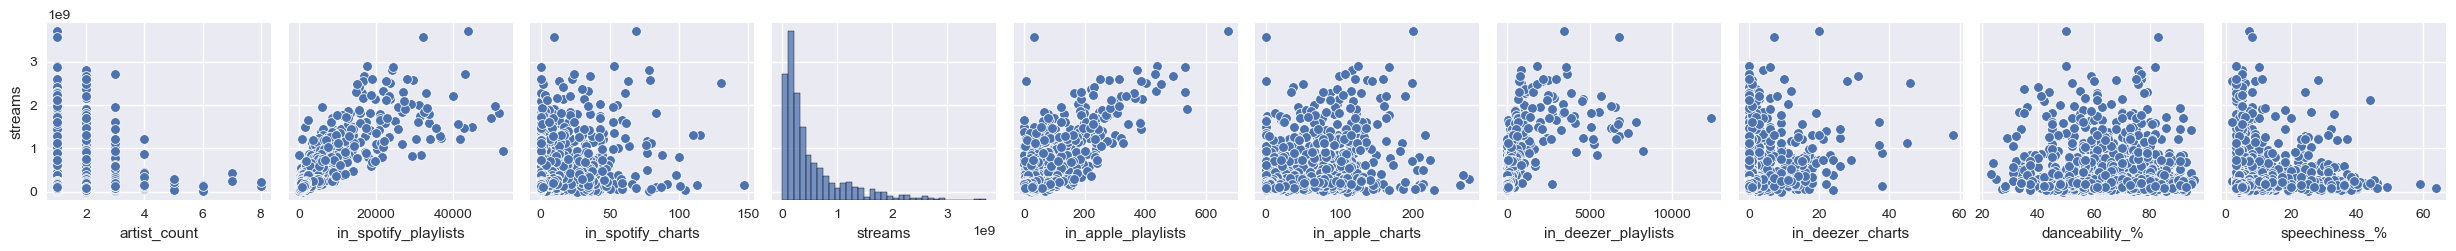

In [20]:
sns.pairplot(data = df, y_vars = 'streams')  
plt.show();

For our Linear Regression Model, we are only going to use as features the ones that have a linear relationship with our target (streams), plus the categorical variables (released_season, mode)

# 5. Other considerations


In [41]:
#We drop the columns that we won´t use

df.drop(columns= ["artist_count", "in_spotify_charts", "in_apple_charts", "in_deezer_charts", "danceability_%",  "speechiness_%"], axis=1, inplace=True)

In [42]:
df.head()

,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,mode,released_season
0,553,141381703,43,45,Major,Summer
1,1474,133716286,48,58,Major,Winter
2,1397,140003974,94,91,Major,Summer
3,7858,800840817,116,125,Major,Summer
4,3133,303236322,84,87,Minor,Spring


<Axes: xlabel='streams', ylabel='Count'>

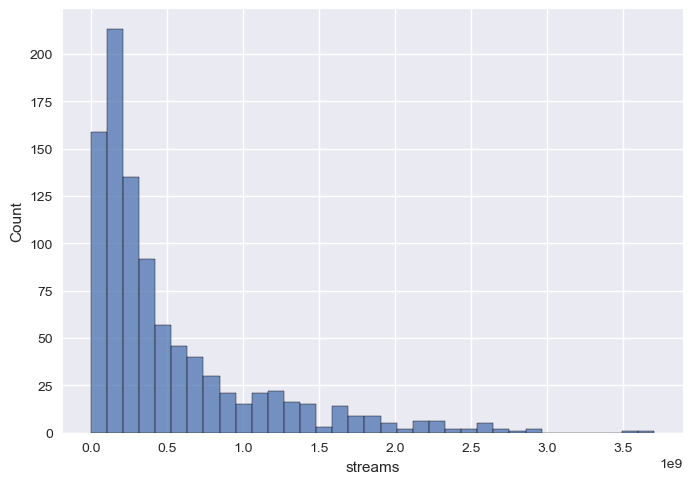

In [25]:
#handling outliers, as Linear regression is pretty sensitive to them

#Our target variable is positively (right) skweed
sns.histplot(df['streams'])

In [ ]:
df.describe()

One common approach used for outlier detection is the Interquartile Range (IQR) which gives us an idea of how spread out the values in the middle of our data set are. 

This method works by sorting your dataset from the smallest to the largest values, then dividing in into four equal parts (called the quartiles). This leaves you with three points:
- **Q1 (first quartile)** - The 25th percentile. 25 percent of the data falls below this point.
- **Q2 (second quartile)** - The median. 50 percent of the data falls below and above this point.
- **Q2 (second quartile)** - The 75th percentile. 75 percent of the data falls below this point.

Using these points, you calculate the **Interquartile Range (IQR)** which is the range between the first and third quartiles

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   in_spotify_playlists  952 non-null    int64 
 1   streams               952 non-null    int64 
 2   in_apple_playlists    952 non-null    int64 
 3   in_deezer_playlists   952 non-null    int64 
 4   mode                  952 non-null    object
 5   released_season       952 non-null    object
dtypes: int64(4), object(2)
memory usage: 44.8+ KB


In [47]:
# Find the 75th and 25th percentiles
stream_seventy_fifth = df["streams"].quantile(0.75)
stream_twenty_fifth = df["streams"].quantile(0.25)

# Calculate iqr
streams_iqr = stream_seventy_fifth - stream_twenty_fifth

# Calculate the thresholds
upper = stream_seventy_fifth + (1.5 * streams_iqr)
lower = stream_twenty_fifth - (1.5 * streams_iqr)

# Subset the data
df = df[(df["streams"] > lower) & (df["streams"] < upper)]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 0 to 951
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   in_spotify_playlists  878 non-null    int64 
 1   streams               878 non-null    int64 
 2   in_apple_playlists    878 non-null    int64 
 3   in_deezer_playlists   878 non-null    int64 
 4   mode                  878 non-null    object
 5   released_season       878 non-null    object
dtypes: int64(4), object(2)
memory usage: 48.0+ KB


In [27]:
df.describe()

,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists
count,878.000000,8.780000e+02,878.000000,878.000000
mean,3709.158314,3.864873e+08,52.382688,197.282460
std,5325.048172,3.469503e+08,58.081386,702.389481
min,31.000000,2.762000e+03,0.000000,0.000000
25%,824.750000,1.344907e+08,12.000000,12.000000
50%,1940.500000,2.599158e+08,29.500000,37.500000
75%,4437.750000,5.366705e+08,73.000000,114.000000
max,52898.000000,1.457139e+09,387.000000,8215.000000


In [71]:
#Scale Numerical Data with StandardScaler()

from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_z = df.copy()

scaler = StandardScaler()
num_cols = df_z.select_dtypes(include=np.number).columns

df_z[num_cols] = scaler.fit_transform(df[num_cols])

df_z.head()

,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,mode,released_season
0,-0.593038,-0.706860,-0.161636,-0.216930,Major,Summer
1,-0.419983,-0.728966,-0.075501,-0.198411,Major,Winter
2,-0.434452,-0.710833,0.716943,-0.151402,Major,Summer
3,0.779562,1.194954,1.095938,-0.102968,Major,Summer
4,-0.108259,-0.240087,0.544672,-0.157100,Minor,Spring


In [70]:
df_z.tail()

,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,mode,released_season
947,-0.517879,-0.850791,0.148451,-0.228326,Major,Summer
948,-0.475226,-0.763124,-0.833490,-0.269637,Major,Summer
949,-0.589280,-0.902585,-0.867944,-0.271062,Major,Summer
950,-0.448920,-0.728449,-0.402814,-0.256817,Major,Summer
951,-0.550009,-0.837715,-0.437268,-0.235449,Minor,Summer


In [81]:
df_dummy = pd.get_dummies(df_z)

In [82]:
df_dummy

,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,mode_Major,mode_Minor,released_season_Spring,released_season_Summer,released_season_Winter
0,-0.593038,-0.706860,-0.161636,-0.216930,True,False,False,True,False
1,-0.419983,-0.728966,-0.075501,-0.198411,True,False,False,False,True
2,-0.434452,-0.710833,0.716943,-0.151402,True,False,False,True,False
3,0.779562,1.194954,1.095938,-0.102968,True,False,False,True,False
4,-0.108259,-0.240087,0.544672,-0.157100,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...
947,-0.517879,-0.850791,0.148451,-0.228326,True,False,False,True,False
948,-0.475226,-0.763124,-0.833490,-0.269637,True,False,False,True,False
949,-0.589280,-0.902585,-0.867944,-0.271062,True,False,False,True,False
950,-0.448920,-0.728449,-0.402814,-0.256817,True,False,False,True,False


In [51]:
#Encoding categorical variables, done after standarization (so standarization was only applied on the "original" numerical columns)

from sklearn.preprocessing import OneHotEncoder

#One-hot-encoding

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df_z.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_z[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_z, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)



In [52]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 870
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   in_spotify_playlists    878 non-null    float64
 1   streams                 878 non-null    float64
 2   in_apple_playlists      878 non-null    float64
 3   in_deezer_playlists     878 non-null    float64
 4   mode_Major              878 non-null    float64
 5   mode_Minor              878 non-null    float64
 6   released_season_Spring  878 non-null    float64
 7   released_season_Summer  878 non-null    float64
 8   released_season_Winter  878 non-null    float64
dtypes: float64(9)
memory usage: 74.3 KB


In [61]:
df_encoded.tail()

,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,mode_Major,mode_Minor,released_season_Spring,released_season_Summer,released_season_Winter
724,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0
753,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0
760,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0
761,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0
870,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0


# Linear Regression Machine Learning Model

##  Specifying Feature and Target variables for our model and spliting the sample into training and testing sets

In [83]:
# Select Features
X = df_dummy.drop('streams', axis=1)

# Select Target
y = df_dummy['streams']

# Set Training and Testing Data

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (702, 8)
Shape of testing feature: (176, 8)
Shape of training label: (702,)
Shape of testing label: (176,)


Fitting the model. **The best-fitting line** minimises the difference between the predicted values and the actual values in the data

In [85]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Interpret the model

In [86]:
#Interpreting the model
lm.intercept_

0.008652897108139601

In [87]:
# Get a table of your feature variable names and their associated coefficients (if multiple)
feature_df = pd.DataFrame(lm.coef_, index=X_train.columns)
feature_df.sort_values(by= 0, ascending= False)

,0
in_spotify_playlists,0.664016
in_apple_playlists,0.300774
released_season_Spring,0.023317
released_season_Summer,0.004449
mode_Minor,0.000588
mode_Major,-0.000588
released_season_Winter,-0.027766
in_deezer_playlists,-0.192816


In [203]:
#We can observe that "in_spotify_playlists" and "in_apple_playlists" explain most of the target variability. Songs that appear on Deezer playlists have a negative relationship with Spotify streams.
#and regarding the released season, songs released during Spring have a positive impact on our target, while Winter has a negative effect on it.

Model Evaluation

**R-squared** (a _coefficient of determination_) is a value between 0 and 1, and is a measure of goodness of fit, representing the proportion of the variance in the target explained by your feature variables. 

If the R-squared value is **_0_**, it means that **none of the variability** in the target variable is explained by the feature variables.

If the R-squared value is **_1_**, it means that **all of the variability** in the target variable is explained by the feature variables

In [88]:
# Checking the overall model perfomance on the entire dataset
lm.score(X, y)

#75% of the variation in the target variable can be explained by the feature variables

0.5702433151699616

In [205]:
#Evaluating Training and Testing sets R-square to check if our model could be over/underfitted

In [89]:
print(f'Training score: {lm.score(X_train, y_train):.2f}')
print(f'Testing score: {lm.score(X_test, y_test):.2f}')

Training score: 0.58
Testing score: 0.53


Evaluation of our model with different metrics:

We can use **Root Mean Squared Error (RMSE)** and/or **Mean Absolute Error (MAE)** in addition to R-squared.

RMSE gives the average magnitude of the errors in the model's prediction. The lower the RMSE, the better predictive accuracy. This metric can produce larger errors if you have outliers and so the larger errors might have a bigger impact on the overall performance of the model. This might be useful if you want to emphasise errors and want to improve the accuracy of the predictions. 

MAE gives the average absolute difference between the predicted and actual values. The lower the MAE, the better the predictive accuracy of your model. Robust to outliers and so might be a preferred metric if you have extreme values in your data set.

In [90]:
# Let's predict the target values of our testing set
test_predictions = lm.predict(X_test)

In [91]:
# Calculate the root mean squared error using the testing data and the predictions
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.68


In [92]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, test_predictions)

# Print the errors using f-strings and 3 decimal places
print(f'MAE: {mae:.2f}')

MAE: 0.48


Cross-validation

We will combine the k-Fold Cross Validation method in making our Linear Regression model, to improve the generalizability of our model, as well as to avoid overfitting in our predictions

In [93]:
from sklearn.model_selection import cross_val_score, KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.54683832, 0.50122513, 0.54279952, 0.58255531, 0.67608709])

In [94]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.38036416, -0.41053895, -0.59728774, -0.44156831, -0.3634736 ])

Using RFE:
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

In [95]:
len(X_train.columns)

8

In [96]:
# running RFE with number of features=5

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, n_features_to_select=5)             
rfe = rfe.fit(X_train, y_train)

In [97]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns(),rfe.support_,rfe.ranking_))

TypeError: 'Index' object is not callable

In [98]:
# predict Spotify streams of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)


0.5265002811061802


In [99]:
# try with another value of RFE
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, n_features_to_select=4)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.5263036814684703


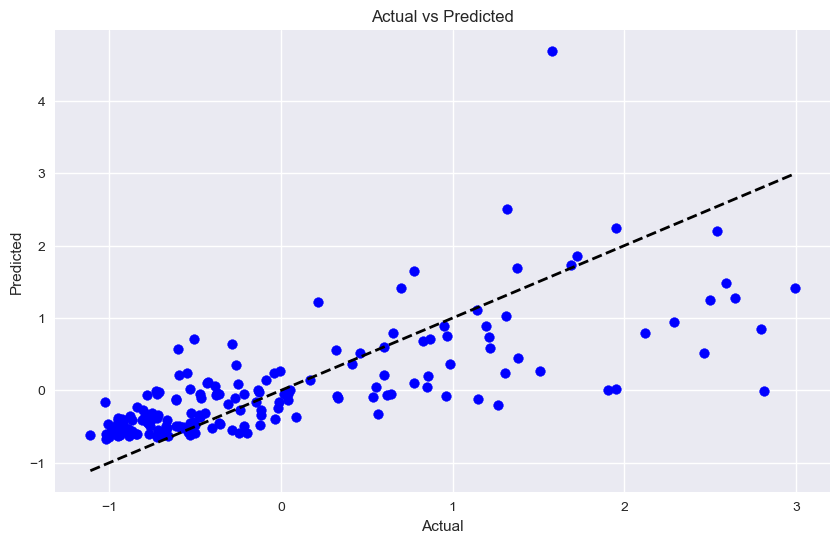

In [100]:
# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Hyperparameter Tuning using Grid Search Cross-validation


In [101]:
# number of features in X_train
len(X_train.columns)

8

In [102]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 9))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8]}],
             return_train_score=True, scoring='r2', verbose=1)

In [103]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018417,0.003104,0.002817,0.000730,1,{'n_features_to_select': 1},0.416169,0.409953,0.488732,0.600025,...,0.494291,0.075241,8,0.524141,0.529707,0.511299,0.481277,0.493022,0.507889,0.018336
1,0.015275,0.001705,0.002056,0.000609,2,{'n_features_to_select': 2},0.529849,0.501343,0.538415,0.562618,...,0.559113,0.055674,7,0.574883,0.584464,0.576678,0.567410,0.548186,0.570324,0.012326
2,0.015380,0.002178,0.003813,0.002245,3,{'n_features_to_select': 3},0.552925,0.510079,0.547160,0.582694,...,0.574163,0.056803,1,0.585783,0.596875,0.589097,0.576954,0.559278,0.581597,0.012860
3,0.009323,0.001259,0.002565,0.001163,4,{'n_features_to_select': 4},0.547446,0.503993,0.545118,0.582922,...,0.571295,0.058465,2,0.586351,0.598444,0.589361,0.577302,0.559829,0.582258,0.013090
4,0.008113,0.001279,0.002200,0.000979,5,{'n_features_to_select': 5},0.547634,0.501425,0.542708,0.582853,...,0.570316,0.059250,3,0.586700,0.598943,0.589462,0.577378,0.559892,0.582475,0.013220
5,0.006907,0.001746,0.002202,0.001163,6,{'n_features_to_select': 6},0.547634,0.501225,0.542708,0.582555,...,0.570042,0.058970,4,0.586700,0.598964,0.589462,0.577409,0.559974,0.582502,0.013195
6,0.005300,0.001076,0.001201,0.000402,7,{'n_features_to_select': 7},0.546838,0.501225,0.542800,0.582555,...,0.569901,0.059023,5,0.586731,0.598964,0.589466,0.577409,0.559974,0.582509,0.013197
7,0.004794,0.002232,0.001992,0.000616,8,{'n_features_to_select': 8},0.546838,0.501225,0.542800,0.582555,...,0.569901,0.059023,6,0.586731,0.598964,0.589466,0.577409,0.559974,0.582509,0.013197


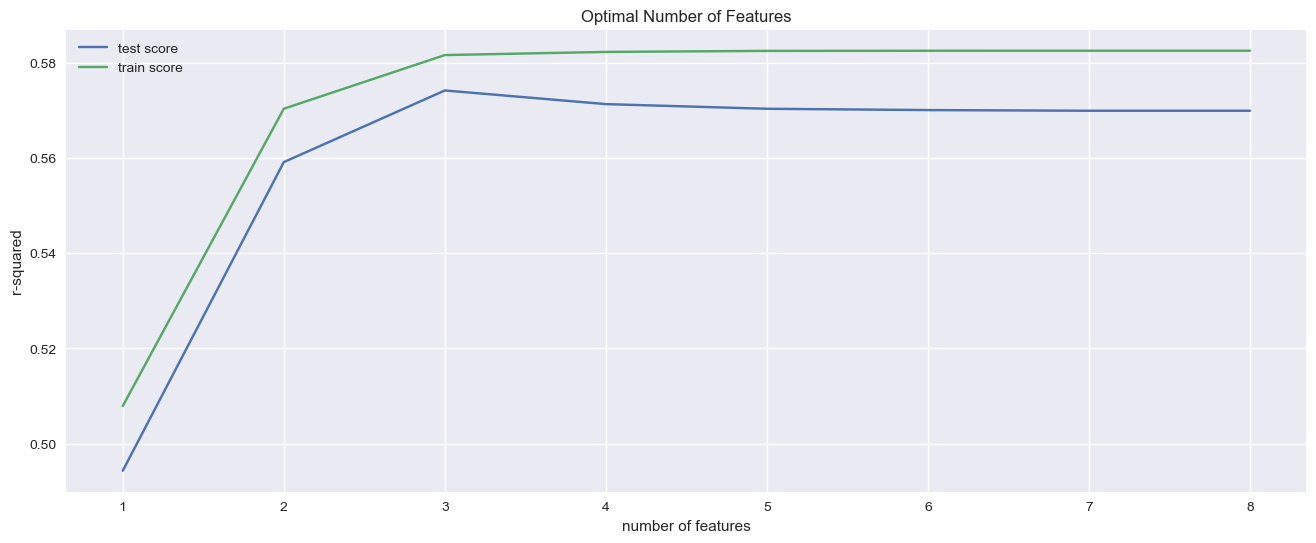

In [104]:
# plotting cv results to help us choose the optimal value of number of features and build a final model
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [105]:
import sklearn

# final model
n_features_optimal = 3

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.526463264972088


In [ ]:
#In general, the mean score estimated by CV will usually be a good estimate of the test score.